In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [100]:
receiving = pd.read_csv('final_receving.csv')
receiving.info()

#create columns for counts
counts_1_3 = receiving['counts_1_3']
counts_2_3 = receiving['counts_2_3']
counts_1_2 = receiving['counts_1_2']

timestamps = receiving['timestamp'].values
print(type(timestamps))
#clean the timestamp data to end in 2022
for i, timestamp in enumerate(timestamps):
    # print(type(timestamp))
    # print(timestamp)
    # print(i+1, 'line')
    if not isinstance(timestamp, str):
        receiving.drop(i, axis=0, inplace=True)
    
receiving.reset_index(drop=True, inplace=True)
print(receiving)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21789 entries, 0 to 21788
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   counts_1_2  21789 non-null  object 
 1   counts_2_3  16073 non-null  float64
 2   counts_1_3  16073 non-null  float64
 3   timestamp   16073 non-null  object 
dtypes: float64(2), object(2)
memory usage: 681.0+ KB
<class 'numpy.ndarray'>
      counts_1_2  counts_2_3  counts_1_3                  timestamp
0             22        31.0        25.0   Mon Nov 21 12:17:58 2022
1             21        17.0        16.0   Mon Nov 21 12:18:58 2022
2             20        20.0        21.0   Mon Nov 21 12:19:58 2022
3             32        32.0        37.0   Mon Nov 21 12:20:58 2022
4             26        26.0        26.0   Mon Nov 21 12:21:58 2022
...          ...         ...         ...                        ...
16068         19        19.0        22.0   Wed Nov 30 16:49:04 2022
16069         19        

In [101]:
receiving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16073 entries, 0 to 16072
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   counts_1_2  16073 non-null  object 
 1   counts_2_3  16073 non-null  float64
 2   counts_1_3  16073 non-null  float64
 3   timestamp   16073 non-null  object 
dtypes: float64(2), object(2)
memory usage: 502.4+ KB


In [102]:
import re
#print(receiving)
for index, row in receiving.iterrows():
  if re.search(r'\\', repr(row['timestamp'])):
    string_cleaner=re.split(r'\\', row['timestamp'], maxsplit=1)
    #print(string_cleaner[0])
    if re.search(r'2022', string_cleaner[0]):
      string_cleanest = re.split(r'2022', string_cleaner[0], maxsplit=2)
      complete_timestamp = str(string_cleanest[0])+'2022'
      #print(complete_timestamp)
      receiving.iloc[index, receiving.columns.get_loc('timestamp')] = complete_timestamp
    #print(index)
    receiving.iloc[index, receiving.columns.get_loc('timestamp')] = string_cleaner[0]
  # elif row['timestamp'].endswith('2\\*'):
  #   string_cleaner=row['timestamp'].split('2\\*', 1)
  #   print(string_cleaner)
  #   # receiving.iloc[index, receiving.columns.get_loc('timestamp')] = string_cleaner[0]

# print(receiving.iloc[14628, receiving.columns.get_loc('timestamp')])

In [103]:
receiving.columns.get_loc('timestamp')

3

In [ ]:
for i, timestamp in enumerate(timestamps):
    print(type(timestamp))
    print(timestamp)
    print(i+1, 'line')
    if timestamp.endswith('\*'):
        string_cleaner=timestamp.split('\*', 1)
        timestamp=string_cleaner[0]
    elif timestamp.endswith(''):
        string_cleaner=timestamp.split('\\n', 1)
        timestamp=string_cleaner[0]

converted_timestamps = pd.to_datetime(timestamps)

In [16]:
receiving.iloc[5926, :]

counts_1_2    \xecj\xe6\xe5\x11\xcf\x84P\xaa\x9bH\xf9\t\xa0@...
counts_2_3                                                  NaN
counts_1_3                                                  NaN
timestamp                                                   NaN
Name: 5926, dtype: object

In [63]:
import re
print(re.search(r"\\|2\\", ))

<re.Match object; span=(24, 26), match='2\\'>


In [61]:
var = r'Tue Nov 29 03:19:03 20222\xcc&\x14\xd4\xa7\x95\x13\xf5\xc6\x9e]\x92\xf4\xa1\xb1\x1f.\xffJF\xe7Z\xc8\xe6n\xb5s\xac\x8fw\xbc]C\x99\xf8\xea\x07v\x84\xdb\x9a{\xa1\xc7\xb4\xf4\x96\xff\x17}0\x98\xa5\xe8Z\x1b>\xf2&/\x1bl\xb1d\r\n'

In [58]:
print(var)

Tue Nov 29 03:19:03 20222\xcc&\x14\xd4\xa7\x95\x13\xf5\xc6\x9e]\x92\xf4\xa1\xb1\x1f.\xffJF\xe7Z\xc8\xe6n\xb5s\xac\x8fw\xbc]C\x99\xf8\xea\x07v\x84\xdb\x9a{\xa1\xc7\xb4\xf4\x96\xff\x17}0\x98\xa5\xe8Z\x1b>\xf2&/\x1bl\xb1d\r\n


In [108]:
counts_1_2 = receiving['counts_1_2'].values
counts_1_3 = receiving['counts_1_3'].values
counts_2_3 = receiving['counts_2_3'].values
timestamps = receiving['timestamp'].values
print(timestamps)
#convert timestamps to datetime
#converted_timestamps = pd.to_datetime(timestamps)

[' Mon Nov 21 12:17:58 2022' ' Mon Nov 21 12:18:58 2022'
 ' Mon Nov 21 12:19:58 2022' ... ' Wed Nov 30 16:51:04 2022'
 ' Wed Nov 30 16:52:04 2022' ' Wed Nov 30 16:53:04 2022']


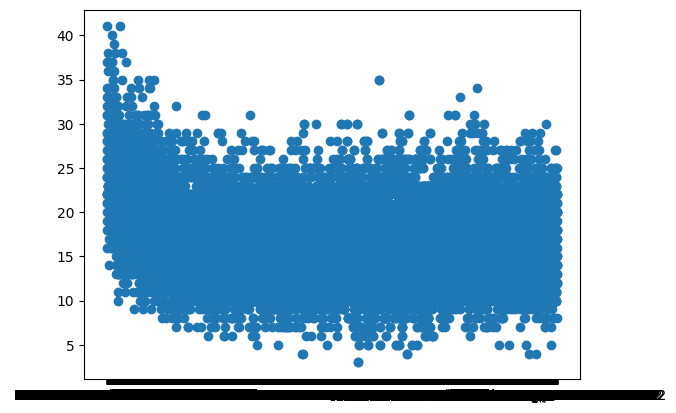

In [88]:
#create a scatter plot of counts against timestamps
# values = []
# for rand in range(1, 500):
#     random_variable = np.random.randint(0, 16053)
#     values.append(random_variable)

plt.scatter(receiving['timestamp'], receiving['counts_1_3'])
plt.show()